Stochastic Oscillator


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv(r"C:\Users\halwa\OneDrive\Desktop\Algo\data. csv")

In [3]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Sep-2021,17718.90,17742.15,17585.35,17618.15,378592721,27167.19
1,01-Oct-2021,17531.90,17557.15,17452.90,17532.05,305763919,20911.61
2,04-Oct-2021,17615.55,17750.90,17581.35,17691.25,295761839,21343.51
3,05-Oct-2021,17661.35,17833.45,17640.90,17822.30,427000191,23066.80
4,06-Oct-2021,17861.50,17884.60,17613.15,17646.00,395833550,24504.30
...,...,...,...,...,...,...,...
224,25-Aug-2022,17679.00,17726.50,17487.45,17522.45,230181848,17566.70
225,26-Aug-2022,17619.30,17685.85,17519.35,17558.90,266636238,17500.80
226,29-Aug-2022,17188.65,17380.15,17166.20,17312.90,244854637,19351.50
227,30-Aug-2022,17414.95,17777.65,17401.50,17759.30,324687477,26284.26


In [4]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))

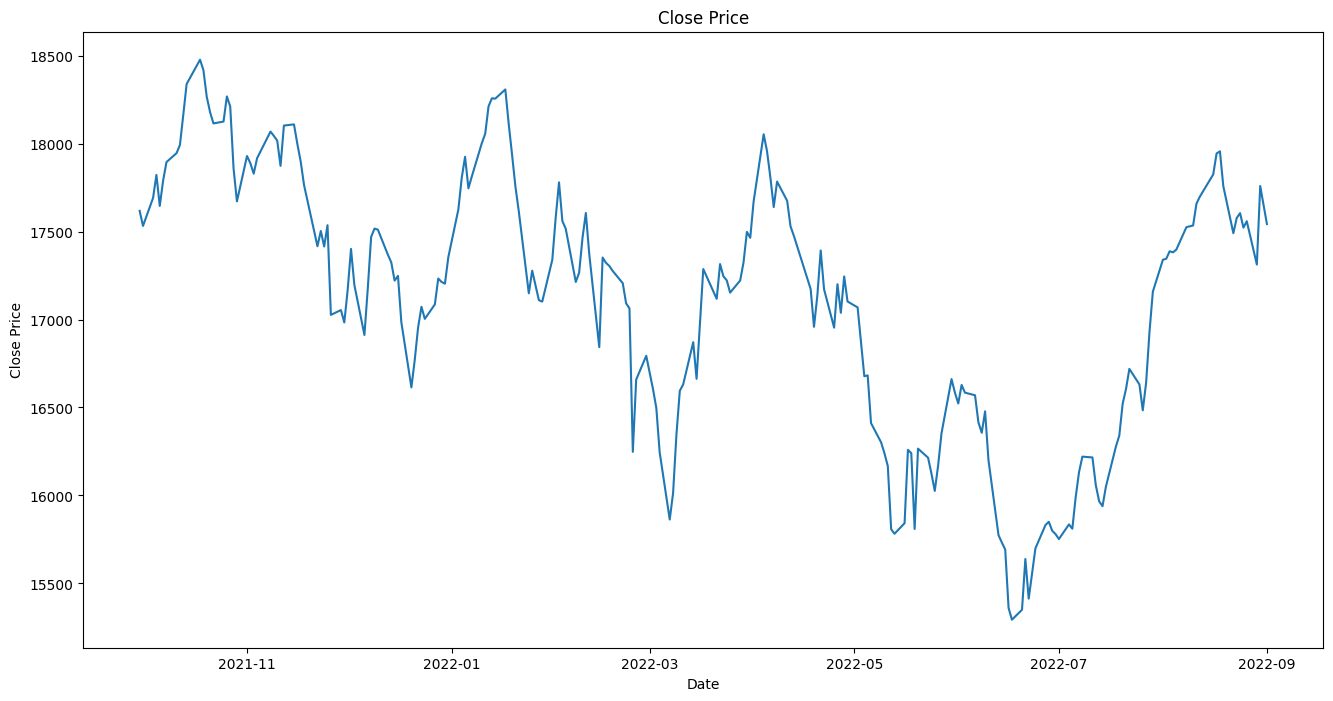

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [6]:
high = data['High'].rolling(14).max()


In [7]:
low = data['Low'].rolling(14).min()

In [8]:
data['%K'] = ( (data['Close']- low) / (high - low) ) * 100 # %K ==> Stochastic Oscillator
# data['%K'] = (data['Close']- low) * 100 / (high - low)

In [9]:
data['%D'] = data['%K'].rolling(3).mean() # %D ==> Mean of %K (Stochastic Oscillator)

In [10]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),%K,%D
2022-08-25,25-Aug-2022,17679.00,17726.50,17487.45,17522.45,230181848,17566.70,43.468319,48.986100
2022-08-26,26-Aug-2022,17619.30,17685.85,17519.35,17558.90,266636238,17500.80,33.029366,43.298133
2022-08-29,29-Aug-2022,17188.65,17380.15,17166.20,17312.90,244854637,19351.50,17.760291,31.419325
2022-08-30,30-Aug-2022,17414.95,17777.65,17401.50,17759.30,324687477,26284.26,71.803874,40.864510
2022-09-01,01-Sep-2022,17485.70,17695.60,17468.45,17542.80,308526598,26813.95,45.593220,45.052462


In [11]:
column_list = ['%K', '%D']

<AxesSubplot: >

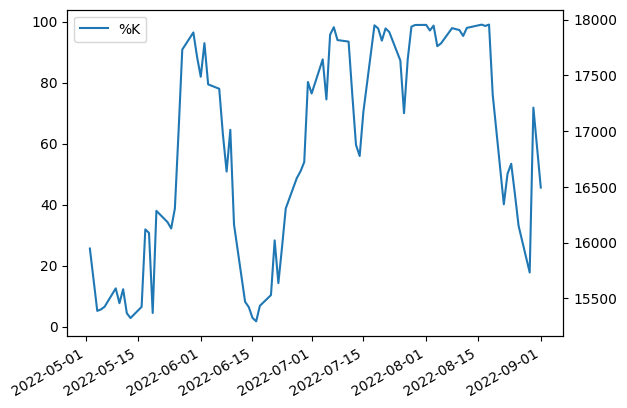

In [14]:
fig, ax = plt.subplots()
# data[['%K', '%D']].plot(ax=ax)
ax.axhline(80, c='r', alpha = 0.3)
ax.axhline(20, c='r', alpha = 0.3)
data[['%K']].loc['2022-05-01':].plot(ax=ax)

data['Close'].loc['2022-05-01':].plot(ax = ax, alpha = 0.0, secondary_y = True) # alpha = 0.3